# **Introduction to FB Prophet**
* **We are going to use FB Prophet to predict the 3 years energy.**

**FB Prophet**
* Prophet is an open source library published by Facebook that is based on decomposable (trend+seasonality+holidays) models. It provides us with the ability to make time series predictions with good accuracy using simple intuitive parameters and has support for including impact of custom seasonality and holidays!


**The Prophet Forecasting Model**
* We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

* g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series
* s(t): periodic changes (e.g. weekly/yearly seasonality)
* h(t): effects of holidays (user provided) with irregular schedules
* $ε_t$: error term accounts for any unusual changes not accommodated by the model
*Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique . We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.

**Trend**
* Trend is modelled by fitting a piece wise linear curve over the trend or the non-periodic part of the time series. The linear fitting exercise ensures that it is least affected by spikes/missing data.

**Changepoints**

* Another question to answer is whether my time series encounters any underlying changes in the phenomena e.g. a new product launch, unforeseen calamity etc.  At such points, the growth rate is allowed to change. These changepoints are automatically selected. However, a user can also feed the changepoints manually if it is required. In the below plot, the dotted lines represent the changepoints for the given time series.

* As the number of changepoints allowed is increased the fit becomes more flexible. There are basically 2 problems an analyst might face while working with the trend component:

* Overfitting
* Underfitting
  * A parameter called changepoint_prior_scale could be used to adjust the trend flexibility and tackle the above 2 problems. Higher value will fit a more flexible curve to the time series.

**Seasonality**
* To fit and forecast the effects of seasonality, prophet relies on fourier series to provide a flexible model. Seasonal effects s(t) are approximated by the following function:

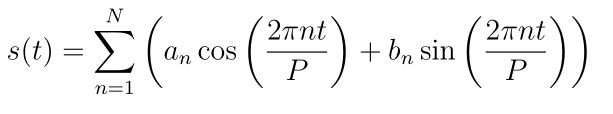

* P is the period (365.25 for yearly data and 7 for weekly data)

* Parameters [a1, b1, ….., aN, bN] need to be estimated for a given N to model seasonality.

* The fourier order N that defines whether high frequency changes are allowed to be modelled is an important parameter to set here. For a time series, if the user believes the high frequency components are just noise and should not be considered for modelling, he/she could set the values of N from to a lower value. If not, N can be tuned to a higher value and set using the forecast accuracy.

**Holidays and events**
* Holidays and events incur predictable shocks to a time series. For instance, Diwali in India occurs on a different day each year and a large portion of the population buy a lot of new items during this period.

* Prophet allows the analyst to provide a custom list of  past and future events. A window around such days are considered separately and additional parameters are fitted to model the effect of holidays and events.

**Prophet in action (using Python)**
* Currently implementations of Prophet are available in both Python and R. They have exactly the same features.

* Prophet() function is used do define a Prophet forecasting model in Python. Let us look at the most important parameters:

**3.1 Trend parameters**

**Parameter	Description**
* growth	linear’ or ‘logistic’ to specify a linear or logistic trend
changepoints	List of dates at which to include potential changepoints (automatic if not specified)
* n_changepoints	If changepoints in not supplied, you may provide the number of changepoints to be automatically included
* changepoint_prior_scale	Parameter for changing flexibility of automatic changepoint selection
 

**3.2 Seasonality & Holiday Parameters**

**Parameter	Description**
* yearly_seasonality	Fit yearly seasonality
* weekly_seasonality	Fit weekly seasonality
* daily_seasonality	Fit daily seasonality
* holidays	Feed dataframe containing holiday name and date
* seasonality_prior_scale	Parameter for changing strength of seasonality model
* holiday_prior_scale	Parameter for changing strength of holiday model
 

* yearly_seasonality, weekly_seasonality & daily_seasonality can take values as True, False and no of fourier terms which was discussed in the last section. If the value is True, default number of fourier terms (10) are taken. Prior scales are defined to tell the model how strongly it needs to consider the seasonal/holiday components while fitting and forecasting.

**Installing pystan and fbprophet libraries**

In [1]:
# # Packages
# !pip install pystan~=2.14
# !pip install fbprophet

**Mounting drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Necessary Packages**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

**Reading the dataset**

In [7]:
url = "/content/drive/MyDrive/Hackathon/Energy_Prediction_Analyics_Vidhya/train_IxoE5JN.csv"
df = pd.read_csv(url)
df2 = df.copy()
df.head()
url_test = '/content/drive/MyDrive/Hackathon/Energy_Prediction_Analyics_Vidhya/test_WudNWDM.csv'
df_test = pd.read_csv(url_test)

**Converet time to datetime format**

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

**Dropping row_id**

In [9]:
df = df.drop(['row_id'], axis = 1)

**Renaming datetime as ds and energy as y because FB Prophet**

In [10]:
df.rename({'datetime': 'ds'}, axis=1, inplace=True)
df.rename({'energy': 'y'}, axis=1, inplace=True)

**Dropping NaN values, because number of NaN values** 

In [11]:
df.dropna(inplace = True)

## **Train Validation Split**

In [16]:
df_train = df.iloc[ : 70000, : ]
df_val = df.iloc[ 70000 : , : ]

In [17]:
df_val

,ds,y
71406,2016-04-23 06:00:00,1539.4756
71407,2016-04-23 07:00:00,1599.7202
71408,2016-04-23 08:00:00,1654.5880
71409,2016-04-23 09:00:00,1669.0076
71410,2016-04-23 10:00:00,1687.7042
...,...,...
94987,2018-12-31 19:00:00,2528.4468
94988,2018-12-31 20:00:00,2461.8836
94989,2018-12-31 21:00:00,2365.9944
94990,2018-12-31 22:00:00,2342.9428


## **Model Creation**

In [18]:
m = Prophet(daily_seasonality = False, seasonality_prior_scale=0.1)
m.add_seasonality(name='daily', period = 24, fourier_order=5)
m.fit(df_train)
future = m.make_future_dataframe(periods = 23092,  freq= 'H')
forecast = m.predict(future)

In [21]:
# m.plot_components(forecast)
df_val

,ds,y
71406,2016-04-23 06:00:00,1539.4756
71407,2016-04-23 07:00:00,1599.7202
71408,2016-04-23 08:00:00,1654.5880
71409,2016-04-23 09:00:00,1669.0076
71410,2016-04-23 10:00:00,1687.7042
...,...,...
94987,2018-12-31 19:00:00,2528.4468
94988,2018-12-31 20:00:00,2461.8836
94989,2018-12-31 21:00:00,2365.9944
94990,2018-12-31 22:00:00,2342.9428


In [22]:
forecasted_energy = forecast[['ds','yhat','yhat_lower','yhat_upper']]
y_pred = forecasted_energy[(forecasted_energy['ds'] <= '	2018-12-31 23:00:00') & (forecasted_energy['ds'] >= '2016-04-23 06:00:00')]

In [23]:
y_pred

,ds,yhat,yhat_lower,yhat_upper
70000,2016-04-23 06:00:00,1811.819541,1547.705110,2083.818911
70001,2016-04-23 07:00:00,1810.803683,1553.405396,2090.347392
70002,2016-04-23 08:00:00,1809.637567,1547.941006,2081.736819
70003,2016-04-23 09:00:00,1808.308359,1548.806162,2075.366097
70004,2016-04-23 10:00:00,1806.803361,1531.649055,2074.107729
...,...,...,...,...
93087,2018-12-11 05:00:00,1730.532087,-1130.878885,4455.980591
93088,2018-12-11 06:00:00,1738.686418,-1142.736520,4437.904655
93089,2018-12-11 07:00:00,1746.640585,-1052.510859,4491.654381
93090,2018-12-11 08:00:00,1754.359507,-1057.744266,4508.185556


In [26]:
df_val['y'].squeeze()

71406    1539.4756
71407    1599.7202
71408    1654.5880
71409    1669.0076
71410    1687.7042
           ...    
94987    2528.4468
94988    2461.8836
94989    2365.9944
94990    2342.9428
94991    2180.2176
Name: y, Length: 23092, dtype: float64

In [36]:
from datetime import date
d0 = date(2008, 3, 1)
d1 = date(2016, 4, 23)
delta = d1 - d0
print(delta.days)

2975


In [39]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Making 11 forecasts with cutoffs between 2010-05-20 05:00:00 and 2015-04-24 05:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,68004.995368,260.777674,213.377301,0.129112,0.112428,0.127140,0.605018
1,36 days 13:00:00,68141.573449,261.039410,213.582076,0.129147,0.112536,0.127213,0.604633
2,36 days 14:00:00,68306.921638,261.355929,213.820278,0.129206,0.112607,0.127309,0.604219
3,36 days 15:00:00,68457.601068,261.644035,214.050293,0.129283,0.112846,0.127411,0.603969
4,36 days 16:00:00,68601.785524,261.919426,214.288621,0.129378,0.113047,0.127524,0.603218


## **Running on complete dataset to predict 3 years energy consumpion**

In [48]:
df_test

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
...,...,...
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00


## **Creating Future Dataframe**

In [51]:
future = m.make_future_dataframe(periods = 50000,  freq= 'H')
forecast = m.predict(future)

In [58]:
forecasted_energy = forecast[['ds','yhat','yhat_lower','yhat_upper']]
predicted = forecasted_energy[(forecasted_energy['ds'] <= '2021-12-31 23:00:00') & (forecasted_energy['ds'] >= '2019-01-01 00:00:00')]

In [64]:
df_test['energy'] = predicted['yhat'].values

In [65]:
df_test

,row_id,datetime,energy
0,94993,2019-01-01 00:00:00,1732.966414
1,94994,2019-01-01 01:00:00,1740.908449
2,94995,2019-01-01 02:00:00,1748.859343
3,94996,2019-01-01 03:00:00,1756.775127
4,94997,2019-01-01 04:00:00,1764.612904
...,...,...,...
26299,121292,2021-12-31 19:00:00,1603.377211
26300,121293,2021-12-31 20:00:00,1602.601517
26301,121294,2021-12-31 21:00:00,1601.760429
26302,121295,2021-12-31 22:00:00,1600.849134


**Dropping Energy Column**

In [70]:
df_forecasted = df_test[['row_id', 'energy']]

In [71]:
df_forecasted

,row_id,energy
0,94993,1732.966414
1,94994,1740.908449
2,94995,1748.859343
3,94996,1756.775127
4,94997,1764.612904
...,...,...
26299,121292,1603.377211
26300,121293,1602.601517
26301,121294,1601.760429
26302,121295,1600.849134


## **Convert to csv and downloading**

In [72]:
from google.colab import files
df_forecasted.to_csv('3_Years_Energy_Forecasted.csv', index=False)
files.download('3_Years_Energy_Forecasted.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>